## 학습목표
- 네이버 블로그 데이터 수집하기
- 네이버 카페 데이터를 수집했던 경험을 통하여 동일한 프로세스로 블로그 글 수집하기
- 수집 후에 워드 클라우드 생성

#### 실습순서
1. "음식물 처리기 사용 후기" 검색결과를 블로크 링크 분석
2. 키워드 검색과 기간설정(6개월)이 가능한 url 생성
3. 드라이버 통해서 페이지 요청
4. 스크롤 내리기 (10번)
5. 블로그 주소 수집 (href_list)
6. 블로그 접근하여 본문 수집 (iframe)
7. 전체 코드 통합
8. 텍스트 데이터 txt 파일로 저장
9. 텍스트 전처리
10. 워드클라우드 생성

In [41]:
from selenium import webdriver as wb
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
from kiwipiepy import Kiwi
from wordcloud import WordCloud as wc
from collections import Counter
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

In [2]:
# 문자열 전처리 함수 -> 숫자, 문자, (?,!,) 제외하고 공백으로 대체
def preprocess_sentence_kr(w):
    w = w.strip()
    w = re.sub(r"[^0-9가-힣?.!,]+"," ", w)
    w = w.strip()
    return w

In [3]:
from urllib.parse import quote

In [4]:
keyword = quote("음식물 처리기")

In [5]:
keyword

'%EC%9D%8C%EC%8B%9D%EB%AC%BC%20%EC%B2%98%EB%A6%AC%EA%B8%B0'

In [6]:
date_option = "6m"

In [7]:
url = f"https://search.naver.com/search.naver?ssc=tab.blog.all&query={keyword}&sm=tab_opt&nso=so%3Ar%2Cp%3A{date_option}"

In [8]:
url

'https://search.naver.com/search.naver?ssc=tab.blog.all&query=%EC%9D%8C%EC%8B%9D%EB%AC%BC%20%EC%B2%98%EB%A6%AC%EA%B8%B0&sm=tab_opt&nso=so%3Ar%2Cp%3A6m'

In [9]:
driver = wb.Chrome()

In [10]:
driver.get(url)

In [11]:
scroll = driver.find_element(By.TAG_NAME,'body')

In [13]:
for i in range(10):
    scroll.send_keys(Keys.END)
    time.sleep(1)

In [19]:
link = driver.find_elements(By.CSS_SELECTOR,'a.fender-ui_228e3bd1.yEnIcjNmMJN3_9CrNfSS')

In [20]:
href_list = [l.get_attribute('href') for l in link]

In [21]:
len(href_list)

300

In [58]:
href_list[0]

'https://blog.naver.com/djusti/224156408404'

In [22]:
driver.get(href_list[0])

In [23]:
driver.switch_to.frame('mainFrame')

In [24]:
driver.find_element(By.CSS_SELECTOR,'div.se-main-container').text

'안녕하세요. 겨울철 음식물 쓰레기 처리가 불편하다고 느끼는 분들 많으시죠? 저도 그중 한 명이었는데요. 4인 가족이다 보니 하루만 지나도 음식물통이 금세 가득 차서 늘 고민이었어요. 그러다 음식물처리기 추천 제품 중 하나인 아이닉 iFD01을 사용하게 되었고, 실제로 한 달간 써본 경험을 정리해보려고 합니다.\n주방 공간을 차지하지 않아 설치 부담이 없었어요\n처음 설치했을 때 가장 먼저 눈에 들어온 건 작고 단정한 외형이었어요. 가로 약 21cm로 비교적 컴팩트한 사이즈라 주방 한쪽에 자연스럽게 배치할 수 있었고, 공간이 좁은 편임에도 자리 차지를 크게 하지 않아 만족스러웠습니다.\n3L 용량이라 하루에 나오는 음식물은 충분히 처리됐는데요. 4인 가족 기준으로도 부족하다고 느낀 적은 없었어요. 남은 음식을 바로 싱크대 옆에서 처리할 수 있어 동선이 짧아지고, 따로 음식물통을 꺼낼 일이 줄어들어 편리했어요.\n냄새 걱정 없이 위생 관리가 수월했어요\n음식물처리기를 사용하기 전 가장 걱정했던 건 냄새 문제였어요. 하지만 필터 부분이 이중 밀폐 구조로 되어 있고, 활성탄 필터가 함께 장착되어 있어 그런지 음식물 보관 중이나 처리 후에도 냄새가 거의 느껴지지 않았습니다.\n가끔 하루 이상 음식물을 넣어두는 일도 있었는데요, 주방에 냄새가 퍼지는 일은 없었어요. 필터는 일정 시간이 지나면 디스플레이를 통해 교체 시기를 알려주기 때문에 따로 신경 쓰지 않아도 되어서 관리도 편했어요.\n고온 건조와 분쇄 기능이 강력했어요\n다른 제품과는 다르게 최고 온도인 180도 고온으로 음식물을 건조하고 분쇄하는 방식인데요. 표준 모드로 사용했을 때 수분이 거의 제거되고 부피도 줄어들어 처리하기 훨씬 수월했어요.\n분쇄력도 만족스러웠습니다. 채소 껍질이나 생선뼈처럼 질기거나 단단한 재료들도 무리 없이 잘 분쇄되었고요. 작동 중 소음도 크지 않아서 밤 시간대에도 불편 없이 사용할 수 있었어요.\n자동 세척 기능으로 위생 관리도 간단했어요\n바스켓 세척은 CLEAN선까지 물을 채우고 

In [25]:
preprocess_sentence_kr(driver.find_element(By.CSS_SELECTOR,'div.se-main-container').text)

'안녕하세요. 겨울철 음식물 쓰레기 처리가 불편하다고 느끼는 분들 많으시죠? 저도 그중 한 명이었는데요. 4인 가족이다 보니 하루만 지나도 음식물통이 금세 가득 차서 늘 고민이었어요. 그러다 음식물처리기 추천 제품 중 하나인 아이닉 01을 사용하게 되었고, 실제로 한 달간 써본 경험을 정리해보려고 합니다. 주방 공간을 차지하지 않아 설치 부담이 없었어요 처음 설치했을 때 가장 먼저 눈에 들어온 건 작고 단정한 외형이었어요. 가로 약 21 로 비교적 컴팩트한 사이즈라 주방 한쪽에 자연스럽게 배치할 수 있었고, 공간이 좁은 편임에도 자리 차지를 크게 하지 않아 만족스러웠습니다. 3 용량이라 하루에 나오는 음식물은 충분히 처리됐는데요. 4인 가족 기준으로도 부족하다고 느낀 적은 없었어요. 남은 음식을 바로 싱크대 옆에서 처리할 수 있어 동선이 짧아지고, 따로 음식물통을 꺼낼 일이 줄어들어 편리했어요. 냄새 걱정 없이 위생 관리가 수월했어요 음식물처리기를 사용하기 전 가장 걱정했던 건 냄새 문제였어요. 하지만 필터 부분이 이중 밀폐 구조로 되어 있고, 활성탄 필터가 함께 장착되어 있어 그런지 음식물 보관 중이나 처리 후에도 냄새가 거의 느껴지지 않았습니다. 가끔 하루 이상 음식물을 넣어두는 일도 있었는데요, 주방에 냄새가 퍼지는 일은 없었어요. 필터는 일정 시간이 지나면 디스플레이를 통해 교체 시기를 알려주기 때문에 따로 신경 쓰지 않아도 되어서 관리도 편했어요. 고온 건조와 분쇄 기능이 강력했어요 다른 제품과는 다르게 최고 온도인 180도 고온으로 음식물을 건조하고 분쇄하는 방식인데요. 표준 모드로 사용했을 때 수분이 거의 제거되고 부피도 줄어들어 처리하기 훨씬 수월했어요. 분쇄력도 만족스러웠습니다. 채소 껍질이나 생선뼈처럼 질기거나 단단한 재료들도 무리 없이 잘 분쇄되었고요. 작동 중 소음도 크지 않아서 밤 시간대에도 불편 없이 사용할 수 있었어요. 자동 세척 기능으로 위생 관리도 간단했어요 바스켓 세척은 선까지 물을 채우고 세제를 넣은 뒤 자동세척 버튼만 누르면

In [26]:
f = open("./data/음식물 처리기 블로그 리뷰.txt","w")

for l in tqdm(href_list):
    driver.get(l)
    driver.switch_to.frame('mainFrame')
    text = driver.find_element(By.CSS_SELECTOR,'div.se-main-container').text
    content = preprocess_sentence_kr(text)
    f.write(content)
f.close()

100%|███████████████████████████████████████████████████████████████████████████████████████| 300/300 [13:44<00:00,  2.75s/it]


In [27]:
f = open("./data/음식물 처리기 블로그 리뷰.txt","r")
word = f.readline()
f.close()

In [28]:
kiwi = Kiwi()

In [29]:
token = kiwi.tokenize(word)

In [30]:
nn_list = [t.form for t in token if t.tag in ['NNG','NNP']]

In [31]:
counter = Counter(nn_list)

In [32]:
top_100 = counter.most_common(100)

In [33]:
from PIL import Image
import numpy as np

In [50]:
mask = np.array(Image.open('./data/pika2.jpg'))

In [54]:
from wordcloud import WordCloud as wc

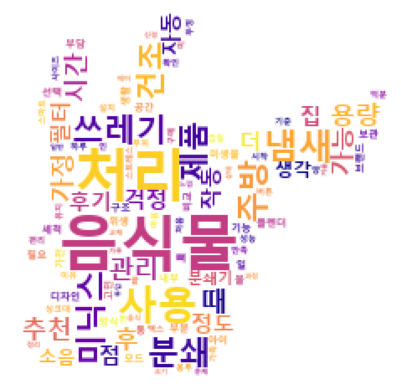

In [56]:
wc = wc(
    font_path='C:/Windows/Fonts/malgunbd.ttf',
    background_color='white' ,
    mask = mask,
    colormap = "plasma"
).generate_from_frequencies(dict(top_100))
plt.imshow(wc)
plt.axis('off')
plt.show()

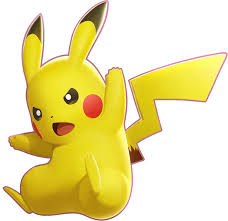

In [57]:
Image.open('./data/pika2.jpg')